# <center>Práctica 2</center>
## <center>Filtrado de imágenes en el dominio espacial </center>

In [19]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imfunctions as imf
%matplotlib notebook

**I. Imágenes contaminadas con ruido**

Considere las fuentes de ruido 'gaussian' y 'speckle' (también denominados ruido gaussiano y ruido granular, respectivamente) y contamine con ellas una imagen sintética de 8 bits, intensidad uniforme y luminancia 128. Considere que la imagen es cuadrada y de tamaño 256x256 píxeles. Indique y justifique la secuencia de instrucciones utilizada, tanto para generar la imagen como para
añadir ruido. Tenga en cuenta que la matriz que representa la imagen debe ser de tipo uint8.

Considere que las fuentes de ruido tienen media nula y su potencia media es 0.02 en los dos casos. 

[[  0 255 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


<IPython.core.display.Javascript object>


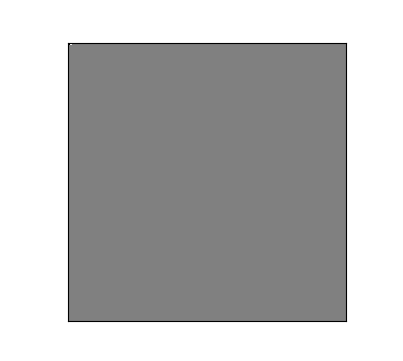

[[ 0.14812929 -0.10645903 -0.09496344 ... -0.04476755  0.23987331
  -0.18970888]
 [-0.13115125  0.15430733 -0.11551533 ...  0.01111354 -0.06444184
   0.0420245 ]
 [-0.10136749 -0.14934175  0.19014434 ... -0.04394103  0.08729435
   0.1201641 ]
 ...
 [ 0.04525859 -0.1063181  -0.2525536  ... -0.05349999 -0.15113358
  -0.03131111]
 [-0.19647671  0.02424788 -0.0287463  ...  0.09400681  0.2811825
   0.12319897]
 [-0.07238646  0.02790284  0.00169832 ... -0.06593146  0.01830432
  -0.12827078]]
float64
(128, 128)
[[ 37 227 103 ... 116 189  79]
 [ 94 167  98 ... 130 111 138]
 [102  89 176 ... 116 150 158]
 ...
 [139 100  63 ... 114  89 120]
 [ 77 134 120 ... 151 199 159]
 [109 135 128 ... 111 132  95]]


<IPython.core.display.Javascript object>


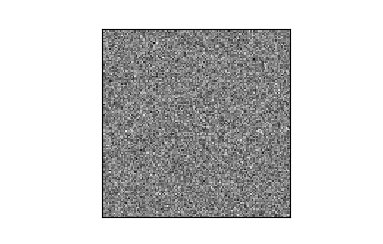

In [20]:
blank = np.ones((128, 128), dtype=np.uint8)*128
blank[0,0] = 0
blank[0,1] = 255
print(blank)
plt.figure('blank')
plt.imshow(blank, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

#generar ruido blanco

blanknoise = imf.imnoise(blank,"gauss", [0,0.1])
plt.figure('white noise')
plt.imshow(blanknoise, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[[49 50 48 ... 58 55 55]
 [47 47 49 ... 56 57 55]
 [48 48 49 ... 57 56 57]
 ...
 [71 70 70 ... 70 69 70]
 [69 71 71 ... 70 72 71]
 [69 68 69 ... 71 72 71]]


<IPython.core.display.Javascript object>


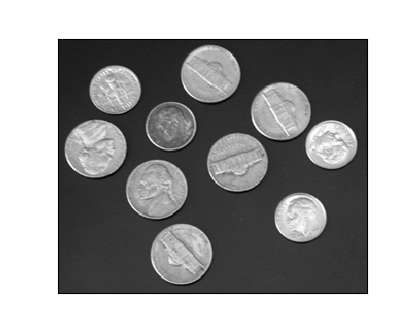

[[ 0.0369989  -0.13410996  0.05974135 ...  0.19364712 -0.10088226
   0.08697997]
 [-0.24707438 -0.04438647 -0.02357902 ... -0.02622887  0.08735458
   0.00564444]
 [-0.02574902  0.00423907  0.07464723 ...  0.0541635  -0.03798605
   0.02904692]
 ...
 [-0.13543246  0.04338318 -0.03497339 ... -0.04142435 -0.06541949
   0.0534165 ]
 [ 0.03507882  0.01354494 -0.05674608 ...  0.04918214  0.27070329
  -0.0971798 ]
 [-0.18413663 -0.13839678 -0.01770998 ... -0.06587289  0.07417121
   0.13552528]]
float64
(246, 300)
[[ 58  15  63 ... 107  29  77]
 [240  35  42 ...  49  79  56]
 [ 41  49  68 ...  70  46  64]
 ...
 [ 36  81  61 ...  59  52  83]
 [ 77  74  56 ...  82 141  46]
 [ 22  32  64 ...  54  90 105]]


<IPython.core.display.Javascript object>


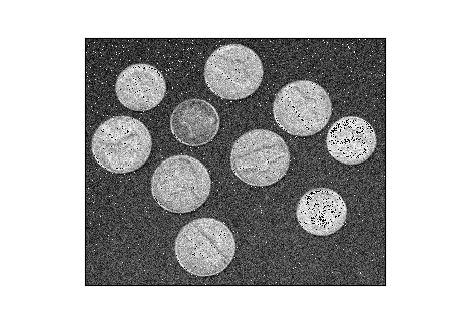

In [18]:
coins = cv2.imread('coins.png', 0)
print(coins)
plt.figure('coins')
plt.imshow(coins, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

coinsgaussian = imf.imnoise(coins,"gauss", [0,0.1])
plt.figure('coins gaussian noise')
plt.imshow(coinsgaussian, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()